## Correlation 
In this section we will develop a measure of how tightly clustered a scatter diagram is about a straight line. Formally, this is called measuring linear association.

The table hybrid contains data on hybrid passenger cars sold in the United States from 1997 to 2013. The data were adapted from the online data archive of Prof. Larry Winner of the University of Florida. The columns:

vehicle: model of the car
year: year of manufacture
msrp: manufacturer's suggested retail price in 2013 dollars
acceleration: acceleration rate in km per hour per second
mpg: fuel econonmy in miles per gallon
class: the model's class.

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    
    plt.show()
    

In [3]:
hybrid=pd.read_csv('hybrid.csv')
hybrid

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact
...,...,...,...,...,...,...
148,S400,2013,92350.00,13.89,21.00,Large
149,Prius Plug-in,2013,32000.00,9.17,50.00,Midsize
150,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,Midsize


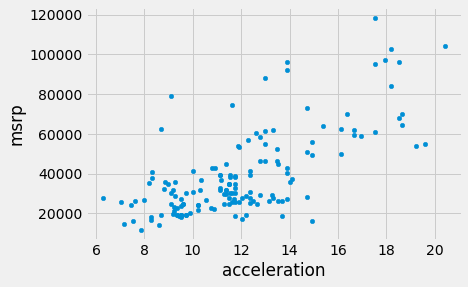

In [4]:

hybrid.plot.scatter('acceleration', 'msrp')


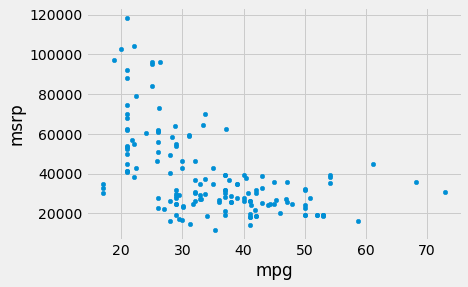

In [5]:
hybrid.plot.scatter('mpg', 'msrp')


Notice the positive association. The scatter of points is sloping upwards, indicating that cars with greater acceleration tended to cost more, on average; conversely, the cars that cost more tended to have greater acceleration on average.

The scatter diagram of MSRP versus mileage shows a negative association. Hybrid cars with higher mileage tended to cost less, on average. This seems surprising till you consider that cars that accelerate fast tend to be less fuel efficient and have lower mileage. As the previous scatter plot showed, those were also the cars that tended to cost more.

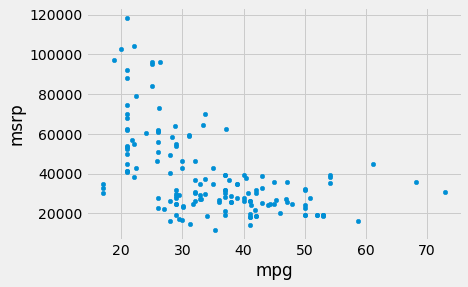

In [6]:
hybrid.plot.scatter('mpg', 'msrp')


Along with the negative association, the scatter diagram of price versus efficiency shows a non-linear relation between the two variables. The points appear to be clustered around a curve, not around a straight line.

If we restrict the data just to the SUV class, however, the association between price and efficiency is still negative but the relation appears to be more linear. The relation between the price and acceleration of SUV's also shows a linear trend, but with a positive slope.

In [7]:
suv = hybrid[(hybrid['class']=='SUV')]
suv 

,vehicle,year,msrp,acceleration,mpg,class
10,Escape,2004,36676.10,10.32,31.99,SUV
14,Lexus RX400h,2005,58521.14,12.76,28.23,SUV
16,Highlander,2005,29186.21,12.76,29.40,SUV
19,Escape 2WD,2005,19322.56,9.52,29.00,SUV
22,Mercury Mariner,2006,34772.40,8.98,32.93,SUV
27,Chevrolet Tahoe,2007,42924.35,10.91,22.35,SUV
28,Kluger,2007,46229.48,12.76,25.87,SUV
30,Tribute,2007,24823.83,11.28,31.75,SUV
31,GMC Yukon,2007,57094.81,12.28,21.78,SUV
33,Vue,2007,22938.33,10.75,26.00,SUV


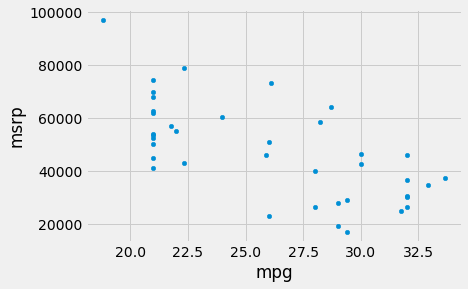

In [8]:
suv.plot.scatter('mpg', 'msrp')


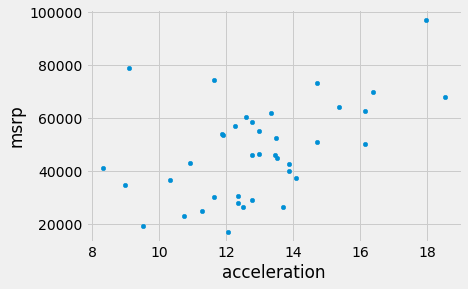

In [9]:
suv.plot.scatter('acceleration', 'msrp')


You will have noticed that we can derive useful information from the general orientation and shape of a scatter diagram even without paying attention to the units in which the variables were measured.

Indeed, we could plot all the variables in standard units and the plots would look the same. This gives us a way to compare the degree of linearity in two scatter diagrams.

Recall that in an earlier section we defined the function standard_units to convert an array of numbers to standard units.

In [10]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers) 

We can use this function to re-draw the two scatter diagrams for SUVs, with all the variables measured in standard units.

In [11]:
s=pd.DataFrame({
    'mpg (standard units)':  standard_units(suv['mpg']), 
    'msrp (standard units)': standard_units(suv['msrp'])})


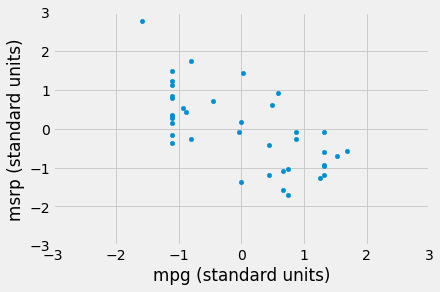

In [12]:

s.plot.scatter('mpg (standard units)', 'msrp (standard units)')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [13]:
A=pd.DataFrame({
    'acceleration (standard units)':  standard_units(suv['acceleration']), 
    'msrp (standard units)': standard_units(suv['msrp'])})


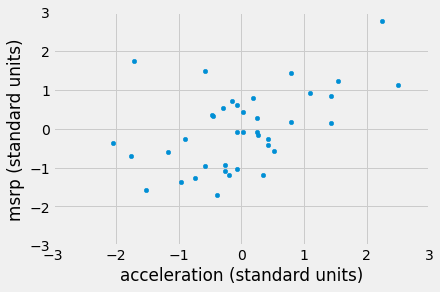

In [14]:

A.plot.scatter('acceleration (standard units)', 'msrp (standard units)')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

The associations that we see in these figures are the same as those we saw before. Also, because the two scatter diagrams are now drawn on exactly the same scale, we can see that the linear relation in the second diagram is a little more fuzzy than in the first.

We will now define a measure that uses standard units to quantify the kinds of association that we have seen.



## The correlation coefficient 
The correlation coefficient measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter diagram is around a straight line.

The term correlation coefficient isn't easy to say, so it is usually shortened to correlation and denoted by  r .

Here are some mathematical facts about  r  that we will just observe by simulation.

The correlation coefficient  r  is a number between  −1  and 1.
r  measures the extent to which the scatter plot clusters around a straight line.
r=1  if the scatter diagram is a perfect straight line sloping upwards, and  r=−1  if the scatter diagram is a perfect straight line sloping downwards.
The function r_scatter takes a value of  r  as its argument and simulates a scatter plot with a correlation very close to  r . Because of randomness in the simulation, the correlation is not expected to be exactly equal to  r .

Call r_scatter a few times, with different values of  r  as the argument, and see how the scatter plot changes.

When  r=1  the scatter plot is perfectly linear and slopes upward. When  r=−1 , the scatter plot is perfectly linear and slopes downward. When  r=0 , the scatter plot is a formless cloud around the horizontal axis, and the variables are said to be uncorrelated.

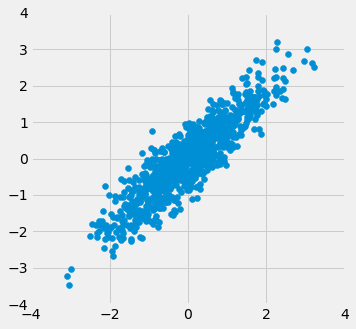

In [15]:
r_scatter(0.9)


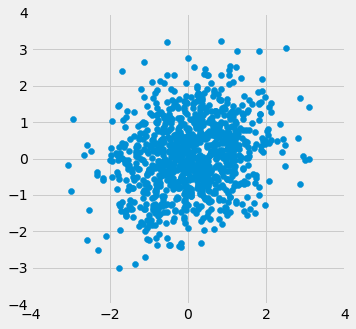

In [16]:
r_scatter(0.25)

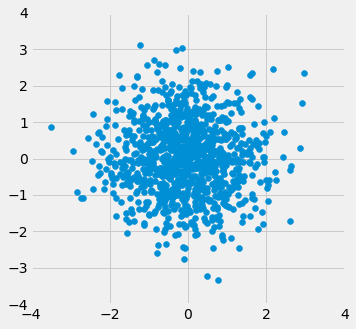

In [17]:
r_scatter(0)

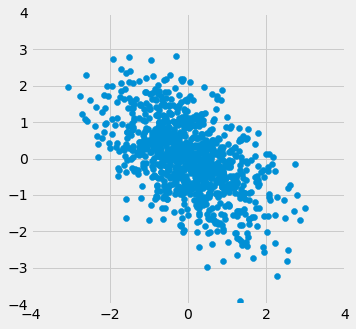

In [18]:
r_scatter(-0.55)

## Calculating  r  
The formula for  r  is not apparent from our observations so far. It has a mathematical basis that is outside the scope of this class. However, as you will see, the calculation is straightforward and helps us understand several of the properties of  r .

## Formula for  r :

r  is the average of the products of the two variables, when both variables are measured in standard units.

Here are the steps in the calculation. We will apply the steps to a simple table of values of  x  and  y .

In [19]:
x = np.arange(1, 7, 1)
y = np.array([2, 3, 1, 5, 2, 7])
t = pd.DataFrame({
        'x': x,
        'y': y
})
t

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


Based on the scatter diagram, we expect that  r  will be positive but not equal to 1.

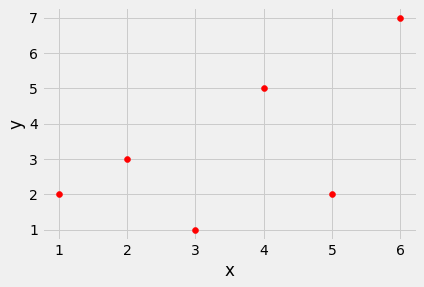

In [20]:

plt.scatter(x,y,color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Step 1. Convert each variable to standard units.

In [21]:
t_su =t.copy()
t_su ['x (standard units)']=standard_units(x)

t_su['y (standard units)']=standard_units(y)
t_su

,x,y,x (standard units),y (standard units)
0,1,2,-1.46385,-0.648886
1,2,3,-0.87831,-0.162221
2,3,1,-0.29277,-1.135550
3,4,5,0.29277,0.811107
4,5,2,0.87831,-0.648886
5,6,7,1.46385,1.784436


Step 2. Multiply each pair of standard units.

In [22]:
t_product=t_su.copy()
t_product['product of standard units'] =  t_su.iloc[:,2] * t_su.iloc[:,3]
t_product

,x,y,x (standard units),y (standard units),product of standard units
0,1,2,-1.46385,-0.648886,0.949871
1,2,3,-0.87831,-0.162221,0.142481
2,3,1,-0.29277,-1.135550,0.332455
3,4,5,0.29277,0.811107,0.237468
4,5,2,0.87831,-0.648886,-0.569923
5,6,7,1.46385,1.784436,2.612146


Step 3.  r  is the average of the products computed in Step 2.

In [23]:
r = np.mean(t_product.iloc[:,4] )
r

0.6174163971897709

Properties of  r  
The calculation shows that:

r  is a pure number. It has no units. This is because  r  is based on standard units.
r  is unaffected by changing the units on either axis. This too is because  r  is based on standard units.
r  is unaffected by switching the axes. Algebraically, this is because the product of standard units does not depend on which variable is called  x  and which  y . Geometrically, switching axes reflects the scatter plot about the line  y=x , but does not change the amount of clustering nor the sign of the association.

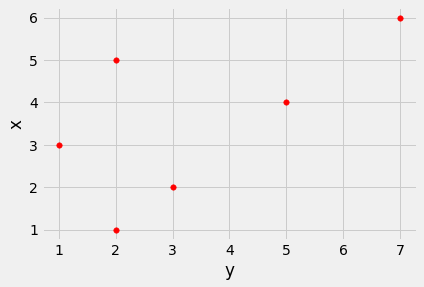

In [24]:

plt.scatter(y,x,s=30,color='red')

plt.xlabel('y')
plt.ylabel('x')
plt.show()

## The correlation function 
We are going to be calculating correlations repeatedly, so it will help to define a function that computes it by performing all the steps described above. Let's define a function correlation that takes a table and the labels of two columns in the table. The function returns  r , the mean of the products of those column values in standard units.

In [25]:
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

Let's call the function on the x and y columns of t. The function returns the same answer to the correlation between  x  and  y  as we got by direct application of the formula for  r .

In [26]:
correlation(t, 'x', 'y')


0.6174163971897709

As we noticed, the order in which the variables are specified doesn't matter.

In [27]:
correlation(t, 'y', 'x')

0.6174163971897709

Calling correlation on columns of the table suv gives us the correlation between price and mileage as well as the correlation between price and acceleration.

In [28]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [29]:
correlation(suv, 'acceleration', 'msrp')

0.4869979927995918

These values confirm what we had observed:

There is a negative association between price and efficiency, whereas the association between price and acceleration is positive.
The linear relation between price and acceleration is a little weaker (correlation about 0.5) than between price and mileage (correlation about -0.67).
Correlation is a simple and powerful concept, but it is sometimes misused. Before using  r , it is important to be aware of what correlation does and does not measure.

##  Association is not Causation 
Correlation only measures association. Correlation does not imply causation. Though the correlation between the weight and the math ability of children in a school district may be positive, that does not mean that doing math makes children heavier or that putting on weight improves the children's math skills. Age is a confounding variable: older children are both heavier and better at math than younger children, on average.



## Correlation Measures Linear Association 
Correlation measures only one kind of association – linear. Variables that have strong non-linear association might have very low correlation. Here is an example of variables that have a perfect quadratic relation  y=x2  but have correlation equal to 0.

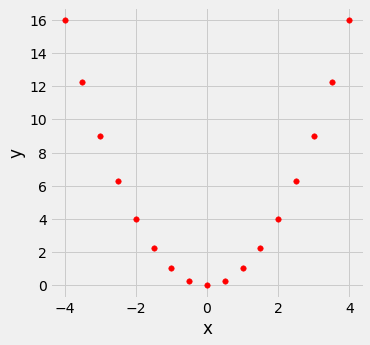

In [30]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = pd.DataFrame({'x': new_x,
        'y': new_x**2})
plt.figure(figsize=(5,5))
plt.scatter(nonlinear['x'], nonlinear['y'], s=30, color='r')
plt.ylabel('y')
plt.xlabel('x')

plt.show()


In [31]:
correlation(nonlinear, 'x', 'y')

0.0

Correlation is Affected by Outliers 
Outliers can have a big effect on correlation. Here is an example where a scatter plot for which  r  is equal to 1 is turned into a plot for which  r  is equal to 0, by the addition of just one outlying point.

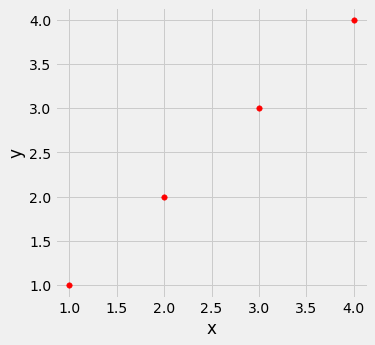

In [32]:
line = pd.DataFrame({
        'x': np.array([1, 2, 3, 4]),
        'y': np.array([1, 2, 3, 4])})
plt.figure(figsize=(5,5))
plt.scatter(line['x'],line['y'], s=30, color='r')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

In [33]:
correlation(line, 'x', 'y')

1.0

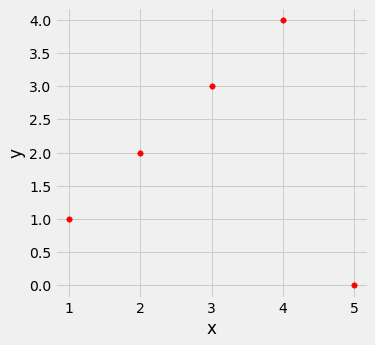

In [34]:
outlier = pd.DataFrame({
        'x':np.array([1, 2, 3, 4, 5]),
        'y': np.array([1, 2, 3, 4, 0])})
plt.figure(figsize=(5,5))
plt.scatter(outlier['x'],outlier['y'], s=30, color='r')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

In [35]:
correlation(outlier, 'x', 'y')

0.0

## Ecological Correlations Should be Interpreted with Care 
Correlations based on aggregated data can be misleading. As an example, here are data on the Critical Reading and Math SAT scores in 2014. There is one point for each of the 50 states and one for Washington, D.C. The column Participation Rate contains the percent of high school seniors who took the test. The next three columns show the average score in the state on each portion of the test, and the final column is the average of the total scores on the test.

In [36]:
sat2014 = pd.read_csv('sat2014.csv')
sat2014=sat2014.sort_values(by=['State'])
sat2014

,State,Participation Rate,Critical Reading,Math,Writing,Combined
21,Alabama,6.7,547,538,532,1617
34,Alaska,54.2,507,503,475,1485
26,Arizona,36.4,522,525,500,1547
15,Arkansas,4.2,573,571,554,1698
33,California,60.3,498,510,496,1504
12,Colorado,14.3,582,586,567,1735
30,Connecticut,88.4,507,510,508,1525
49,Delaware,100.0,456,459,444,1359
50,District of Columbia,100.0,440,438,431,1309
43,Florida,72.2,491,485,472,1448


The scatter diagram of Math scores versus Critical Reading scores is very tightly clustered around a straight line; the correlation is close to 0.985.

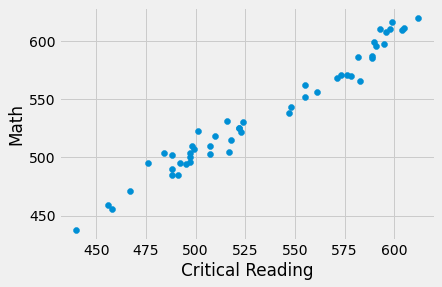

In [37]:
M=sat2014['Critical Reading']
C=sat2014['Math']
plt.scatter(M,C)

plt.xlabel('Critical Reading')
plt.ylabel('Math')
plt.show()

In [38]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067431

That's an extremely high correlation. But it's important to note that this does not reflect the strength of the relation between the Math and Critical Reading scores of students.

The data consist of average scores in each state. But states don't take tests – students do. The data in the table have been created by lumping all the students in each state into a single point at the average values of the two variables in that state. But not all students in the state will be at that point, as students vary in their performance. If you plot a point for each student instead of just one for each state, there will be a cloud of points around each point in the figure above. The overall picture will be more fuzzy. The correlation between the Math and Critical Reading scores of the students will be lower than the value calculated based on state averages.

Correlations based on aggregates and averages are called ecological correlations and are frequently reported. As we have just seen, they must be interpreted with care.

Serious or tongue-in-cheek? 
In 2012, a paper in the respected New England Journal of Medicine examined the relation between chocolate consumption and Nobel Prizes in a group of countries. The Scientific American responded seriously whereas others were more relaxed. You are welcome to make your own decision! The following graph, provided in the paper, should motivate you to go and take a look.

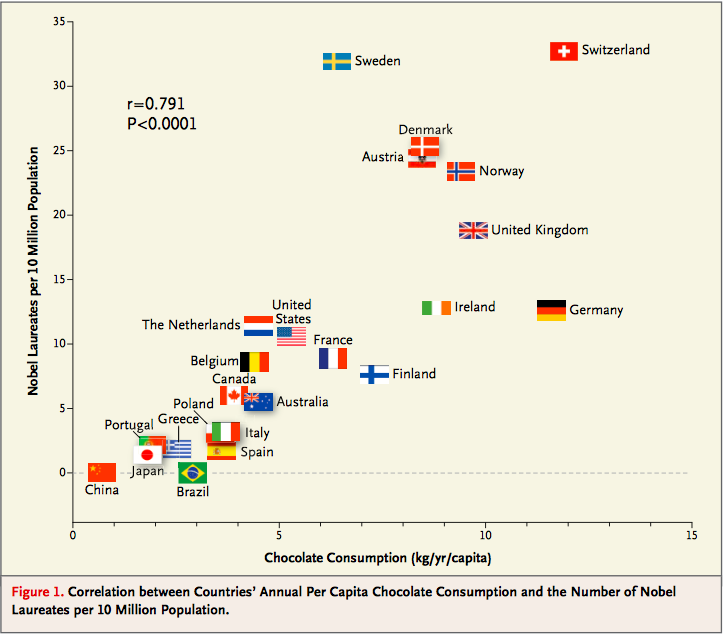

In [40]:

from IPython.display import Image
Image("image.png")